In [21]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\jingyli\OwnDrive\IPA\result"
FIG_DIR = os.path.join(path,"validation_mse_figure")
if not os.path.exists(FIG_DIR):
    os.mkdir(FIG_DIR)

In [3]:
NETWORK_NAME = "UnetDeep_"

mse = np.load(os.path.join(path, NETWORK_NAME+"validation_mse.npy"))
mse_vol = np.load(os.path.join(path, NETWORK_NAME+"validation_mse_volume.npy"))
mse_speed = np.load(os.path.join(path, NETWORK_NAME+"validation_mse_speed.npy"))

In [33]:
# Extract daily mse
dmse = mse.reshape(18,-1)  # 18 validation days
dmse_vol = mse_vol[0].reshape(18,-1)
dmse_speed = mse_speed[0].reshape(18,-1)

In [38]:
# Reduce by mean and std
def reduce(m):
    return np.mean(m, axis=0), np.std(m, axis=0)

dmse_, dmse_err = reduce(dmse)
dmse_vol_, dmse_vol_err = reduce(dmse_vol)
dmse_speed_, dmse_speed_err = reduce(dmse_speed)

# Visualize MSE daily

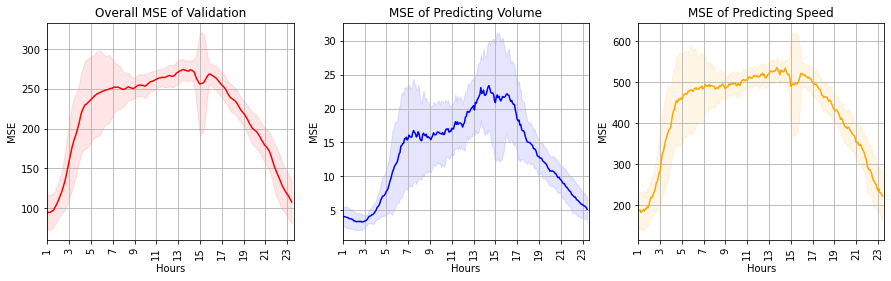

In [63]:
x = np.arange(dmse_.shape[0])
x_ticks = np.arange(0,270,24)
x_ticklabel = [f"{_:.0f}" for _ in np.arange(1,23.5,2)]

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,4))

def plot_ax(ax, color, data, data_err):
    ax.plot(x, data, color=color)
    ax.fill_between(x, data+data_err, data-data_err, interpolate=True, color=color, alpha=.1)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticklabel)
    ax.tick_params(axis="x", rotation=90)
    ax.set_xlim(0,271)
    ax.grid("on")
    ax.set_ylabel("MSE")
    ax.set_xlabel("Hours")

plot_ax(axes[0], "red", dmse_, dmse_err)
axes[0].set_title("Overall MSE of Validation")
plot_ax(axes[1], "blue", dmse_vol_, dmse_vol_err)
axes[1].set_title("MSE of Predicting Volume")
plot_ax(axes[2], "orange", dmse_speed_, dmse_speed_err)
axes[2].set_title("MSE of Predicting Speed")
plt.savefig(os.path.join(FIG_DIR, "mse_daily.pdf"), bbox_inches="tight")
plt.show()

# Visualize MSE in each validation day

In [4]:
DATA_DIR = r"C:\Users\jingyli\OwnDrive\IPA\data\2021_IPA\ori\Berlin\validation"
# Get date names
file_paths = glob.glob(os.path.join(DATA_DIR,'*.h5'))
file_names = [f.split("\\")[-1].split("_")[0] for f in file_paths]

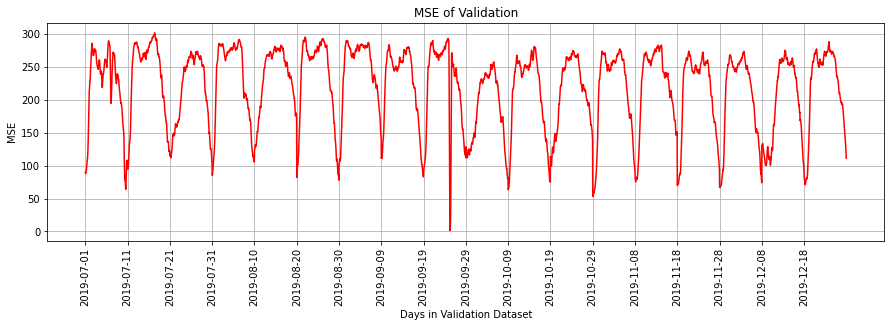

In [16]:
# Overall mse
x_ticks = [i for i in range(mse.shape[0]) if i % 270 == 0]
x_ticklabel = file_names
plt.figure(1, figsize=(15,4))
plt.plot(mse, color="red")
plt.xticks(x_ticks, x_ticklabel, rotation=90)
plt.grid("on")
plt.title("MSE of Validation")
plt.ylabel("MSE")
plt.xlabel("Days in Validation Dataset")
plt.savefig(os.path.join(FIG_DIR, "mse.pdf"), bbox_inches="tight")
plt.show()

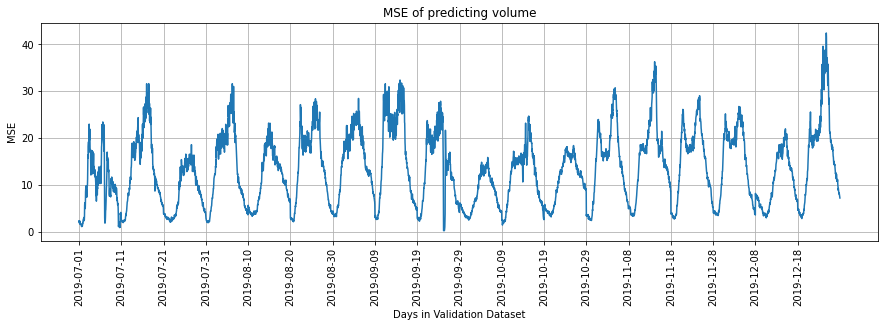

In [17]:
# For volume, the first timestamp in prediction
x_ticks = [i for i in range(mse_vol[0].shape[0]) if i % 270 == 0]
x_ticklabel = file_names
plt.figure(1, figsize=(15,4))
plt.plot(mse_vol[0])
plt.xticks(x_ticks, x_ticklabel, rotation=90)
plt.grid("on")
plt.title("MSE of predicting volume")
plt.ylabel("MSE")
plt.xlabel("Days in Validation Dataset")
plt.savefig(os.path.join(FIG_DIR, "mse_volume.pdf"), bbox_inches="tight")
plt.show()

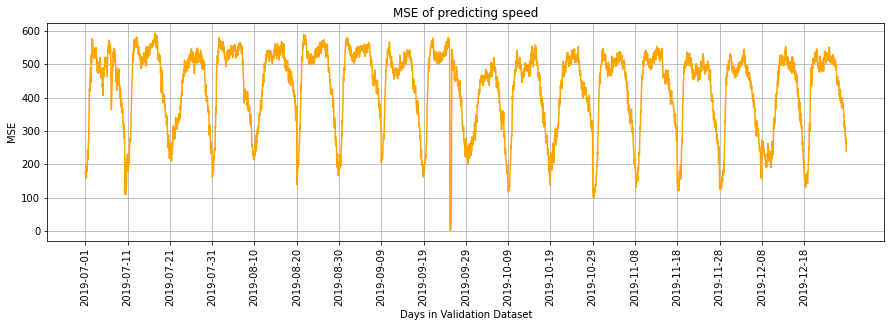

In [18]:
# For speed, the first timestamp in prediction
x_ticks = [i for i in range(mse_speed[0].shape[0]) if i % 270 == 0]
x_ticklabel = file_names
plt.figure(1, figsize=(15,4))
plt.plot(mse_speed[0], color="orange")
plt.xticks(x_ticks, x_ticklabel, rotation=90)
plt.grid("on")
plt.title("MSE of predicting speed")
plt.ylabel("MSE")
plt.xlabel("Days in Validation Dataset")
plt.savefig(os.path.join(FIG_DIR, "mse_speed.pdf"), bbox_inches="tight")
plt.show()

## MSE of Predicting different timestamps

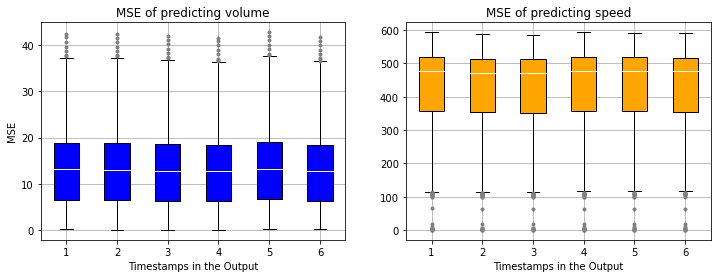

In [76]:
# Predict volume/speed

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=False)
ax1.set_title("MSE of predicting volume")
ax2.set_title("MSE of predicting speed")

flierprops = dict(marker='o', markerfacecolor='grey', markersize=4,
                  markeredgecolor='none')

v = ax1.boxplot(mse_vol.transpose(),patch_artist=True, medianprops=dict(color="white"), flierprops=flierprops)
s = ax2.boxplot(mse_speed.transpose(),patch_artist=True, medianprops=dict(color="white"),flierprops=flierprops)

def set_color(bplot, color):
    for patch, color in zip(bplot['boxes'], [color]*len(bplot['boxes'])):
        patch.set_facecolor(color)
        
set_color(v, "blue")
set_color(s, "orange")


ax1.grid(True)
ax2.grid(True)

ax1.set_ylabel("MSE")
ax1.set_xlabel("Timestamps in the Output")
ax2.set_xlabel("Timestamps in the Output")
plt.savefig(os.path.join(FIG_DIR, "mse_timestamps.pdf"), bbox_inches="tight")
plt.show()